In [94]:
import pandas as pd
import numpy as np
from spellchecker import SpellChecker

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as io

In [103]:
res = pd.read_excel("data/Favourite Teacher Student Feedback (Responses).xlsx")
res.head()

,Timestamp,What makes your favourite teacher your favourite?,What impact did they have on you?,What makes them unique?,"Out of the following list, what would you describe your favourite teacher as?"
0,2023-08-17 15:43:14.838,He's funny and he marks really softly.,Easy learning,NaN,"compassionate, friendly, humourous, intelligen..."
1,2023-08-17 15:44:33.289,Her classroom is pretty and she teaches well.,"Other than school, they also talked to me abou...",They put more effort in compared to other teac...,"dedicated, inspiring, organized"
2,2023-08-17 15:45:15.110,"-nice, chill, teaches well, no excessive works...",-made me like their subject more,-controlled class at right times but not in a ...,"patient, friendly, humourous, diligent, insigh..."
3,2023-08-17 15:45:31.489,A teacher that makes learning fun and interact...,"They made my year very exciting, and I found m...",They are very open to the struggles of student...,"compassionate, dedicated, inspiring, eager, pa..."
4,2023-08-17 15:45:51.251,They're rational and they don't play favorites...,NaN,They know alot of outdoor education things. I ...,"dedicated, eager, patient, friendly, motivatin..."


# Data Cleaning

In [12]:
columns = ["Timestamp", "Favourite", "Impact", "Unique", "Characteristics"]
res.columns = columns

In [13]:
# Spellchecker

error_ind = {}

def spell_check(df, col):
    spell_checker = SpellChecker()
    
    for ind, row in df.iterrows():
        df[col] = df[col].astype(str)
        try:
            all_list = row[col].split(" ")
            final_list = []
        
            for word in all_list:
                word = spell_checker.correction(word)
                final_list.append(word)
                df.loc[ind, col] = " ".join(final_list)
        except:
            continue
    return df
    
col_list = res.columns[1:-1]

for column in col_list:
    spell_check(res, column)
    
res

,Timestamp,Favourite,Impact,Unique,Characteristics
0,2023-08-17 15:43:14.838,He's funny and he marks really softly,Easy learning,can,"compassionate, friendly, humourous, intelligen..."
1,2023-08-17 15:44:33.289,Her classroom is pretty and she teaches well i,Other than school they also talked to me about...,They put more effort in compared to other teac...,"dedicated, inspiring, organized"
2,2023-08-17 15:45:15.110,nice chill teaches well no excessive worksheets,made me like their subject more,controlled class at right times but not in a w...,"patient, friendly, humourous, diligent, insigh..."
3,2023-08-17 15:45:31.489,A teacher that makes learning fun and interact...,They made my year very exciting and I found mo...,They are very open to the struggles of student...,"compassionate, dedicated, inspiring, eager, pa..."
4,2023-08-17 15:45:51.251,They're rational and they don't play favorites...,can,They know lot of outdoor education things I al...,"dedicated, eager, patient, friendly, motivatin..."
...,...,...,...,...,...
70,2023-09-08 10:22:03.802,patient understanding and Fun,Not stressed during class as I know there's al...,Seems to relate to students better than any ot...,"compassionate, organized, patient, friendly, h..."
71,2023-09-08 10:22:21.868,She made the things we had to learn fun and in...,They made me stop hating school so much,they are a talkative and funny teacher,"compassionate, dedicated, inspiring, eager, or..."
72,2023-09-08 10:23:33.197,ink no homework and um isn't mean,i felt like i had to impress them and that fee...,they were really understanding,"patient, friendly, motivating, diligent, carin..."
73,2023-09-08 10:25:13.238,she made me like a class i hate i,they made me like that class,they can joke around with you,"compassionate, dedicated, inspiring, eager, or..."


# Visualizations

Displaying word cloud for Favourite.


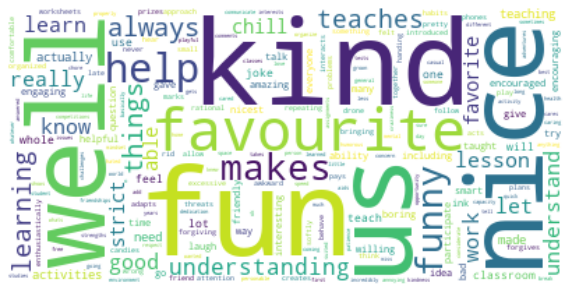

Displaying word cloud for Impact.


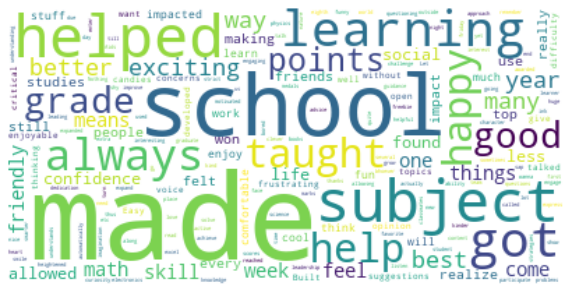

Displaying word cloud for Unique.


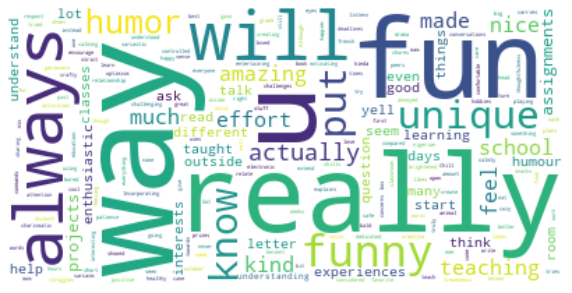

In [102]:
def create_wordcloud(df, col):
    print(f"Displaying word cloud for {col}.")
    all_text =  " ".join(text for text in df[col])
    stopwords = list(STOPWORDS) + ["teacher", "teachers", "students", "make", "class"]
    word_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f"visualization/wc_{col}.png")
    plt.show()
    
for column in col_list:
    create_wordcloud(res, column)

In [43]:
mydic = {'Paras': None, 'Jain': None, 'Cyware': None}
list(mydic.keys())

['Paras', 'Jain', 'Cyware']

In [79]:
def count_values(df, col):
    all_lists = df[col].values
    count = {}
    for ind, item in enumerate(all_lists):
        item_words = item.split(", ")
        for ind_item in item_words:
            if ind_item in list(count.keys()):
                count[ind_item] += 1
            else:
                count[ind_item] = 1
    return count

count_dict = count_values(res, "Characteristics")
count_df = pd.DataFrame.from_dict(count_dict, orient="index").reset_index()
count_df.columns = ["Characteristic", "Count"]
count_df = count_df.sort_values(by="Count")
count_df

,Characteristic,Count
23,technological,13
22,meticulous,14
9,diligent,24
15,eager,26
10,insightful,26
12,sincere,31
17,committed,34
14,wise,34
18,enthusiastic,37
5,dedicated,38


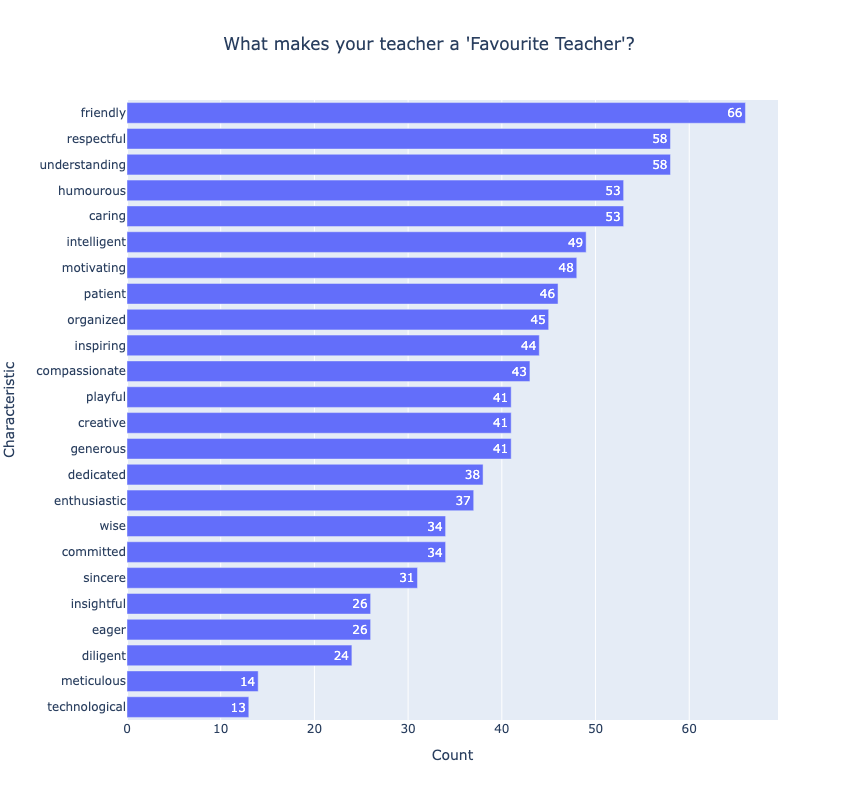

In [81]:
bar = px.bar(count_df, x="Count", y="Characteristic", 
             title="What makes your teacher a 'Favourite Teacher'?", text_auto='.2s')
bar.update_layout(width=800, height=800, title=dict(x=0.5))
bar.show()

In [100]:
bar.write_html("visualization/bar.html")

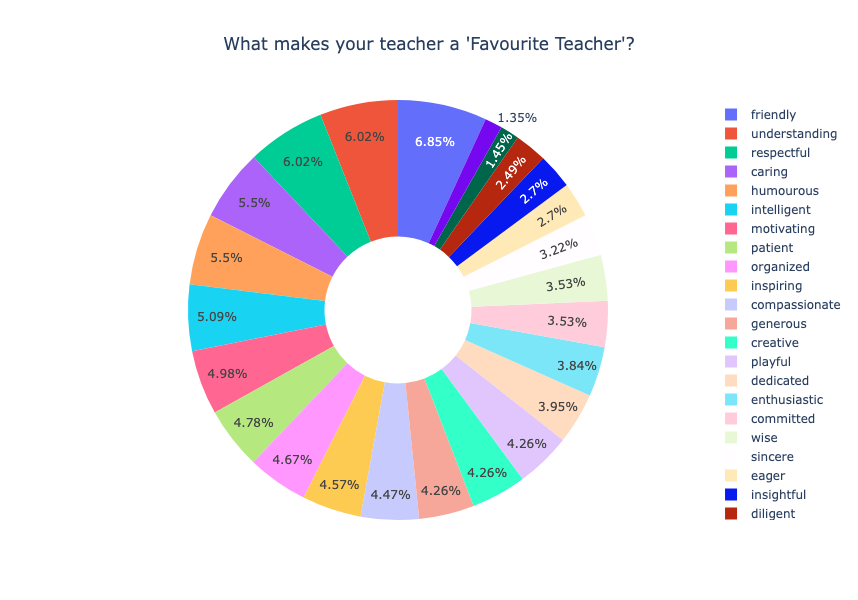

In [92]:
pie = px.pie(count_df, values="Count", names="Characteristic",
            title="What makes your teacher a 'Favourite Teacher'?",hole=0.35)
pie.update_layout(width=600, height=600, title=dict(x=0.5))
pie.show()

In [99]:
# pie.write_html("visualization/pie.html")